# The Sparks Foundation #GRIPMAY2021 
#### Task2

## Task :- Prediction using Unsupervised Machine Learning

### by :- Ajay Ranwa

#### Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans

#### Read csv file

In [2]:
df = pd.read_csv('Iris.csv')
print("Data of top 5 rows in file Studeent_data.csv")
df

Data of top 5 rows in file Studeent_data.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# data Frame for cluster
X = df.iloc[:,[1,2]].values

## Here we will find k value which is no of clusters

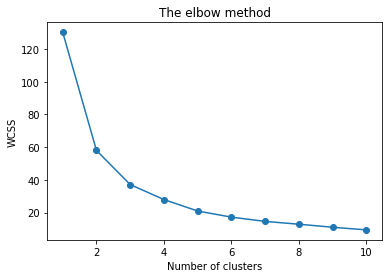

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # where inertia_ = Sum of squared distances of samples to their closest cluster center.
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.scatter(range(1, 11), wcss)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### *This is 'Elbow Method' to find k value. We will take that value here which have maximum band in it.

#### So the best values for k will be "3" here.

## Now, we have our K Value . We will predict that data in k_means Algo.

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Now , plot that data in Scatter plot to find clusters.

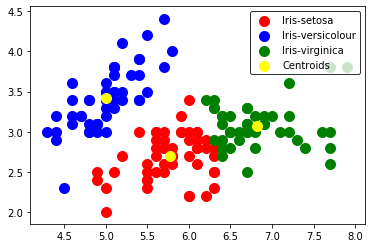

In [6]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2,0] ,X[y_kmeans == 2,1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend(loc='upper right',edgecolor = 'black')